In [25]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import bar_chart_race as bcr
from matplotlib.animation import FuncAnimation

In [26]:
# Import list of silent features from .csv file.
data = pd.read_csv("Resources/silent_features.csv", encoding='ISO-8859-1', usecols=['Number', 'Beginning Year', 'Ending Year', 'Country 1', 'Country 2', 'Country 3'], on_bad_lines='skip', header=0)

In [27]:
# Begin creating the count of movies in each year. We will load this into a DataFrame below for use in the bar chart race. 
# Count number of movies.
movie_count = len(data.index)

In [28]:
# Create an empty DataFrame, which we will load with the counts by year.
frames = pd.DataFrame()

# Count the movies by year with a for loop.
for i in range(1,movie_count):
    # Pick out the first i rows of the dataset.
    so_far = data.iloc[range(i),:]
    # Create a new column in the DataFrame 'frames' that will store the counts for the first i rows.
    new_col = pd.DataFrame(so_far.groupby("Beginning Year")["Beginning Year"].count())
    # Rename the new column to the corresponding row number.
    new_col = new_col.rename(columns = {"Beginning Year" : i})
    # Add the new column to the 'frames' DataFrame.
    frames = pd.concat([frames, new_col], axis = 1)

frames

,1,2,3,4,5,6,7,8,9,10,...,458,459,460,461,462,463,464,465,466,467
Beginning Year,,,,,,,,,,,,,,,,,,,,,
1922,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,21,21,21,21,21,21,21,21,21,21
1927,NaN,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,42,42,42,43,43,44,44,44,44,44
1928,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,39,39,39,39,39,39,39,39,39,40
1925,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,34,34,34,34,34,34,34,34,34,34
1923,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,2.0,2.0,...,23,23,23,23,23,23,23,23,23,23
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,7,7,7,7,7,7,7,7,7,7
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,7,7,7,7,7,7,7,7,7,7
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27,27,27,27,27,27,27,27,27,27
1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24,24,24,24,24,24,24,24,24,24


In [29]:
# Put the rows of 'frames' in increasing order
frames = frames.sort_values('Beginning Year')

# Enter 0 for all empty cells
frames = frames.fillna(0)

frames

,1,2,3,4,5,6,7,8,9,10,...,458,459,460,461,462,463,464,465,466,467
Beginning Year,,,,,,,,,,,,,,,,,,,,,
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,5,5,5,5,5,5,5,5,5
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,10,10,10,10,10,10,10,10,10
1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,14,14,14,14,14,14,14,14,14
1914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,12,13,13,13,13,13,13,13,13
1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14,14,14,14,14,14,14,14,14,14
1916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26,26,26,26,26,26,26,26,26,26
1917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11,11,11,11,11,11,11,11,11,11
1918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,11,11,11,11,11,11,11,11,11


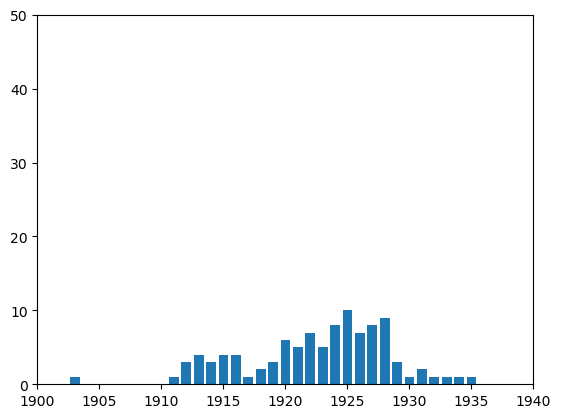

In [36]:
# Create function to create a bar chart for a given year using Matplotlib.
def draw_chart(movie_total):
    plt.bar(frames.index, frames.iloc[:,movie_total])
    plt.xlim(1900,1940)
    plt.ylim(0,50)

draw_chart(100)